This notebook serves as an introduction to logistic regression. It follows a notebook on linear regression and machine learning written previously.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np

Logisitic Regression is often most valuable in classification problems. A common example is tumor diagnosis. There can be lots of input parameters (size of tumor, location of tumor, growth rate of tumor, etc), but often the thing you want to know is if the tumor is benign or malignant.

Let me use that as a good case example. I'll create some fake data right now, and then show how to use logistic regression and gradient descent to distinguish between the 2 cases.

In [36]:
BenignSize=np.random.uniform(.1, .51, size=50)
MalignantSize=np.random.uniform(.49, 1.0, size=50)
dataSize=np.concatenate((BenignSize,MalignantSize),axis=0)

And let me code benign tumors as 0 and malignant tumors as 1:

In [38]:
BenignCode=np.zeros(len(BenignSize));
MalignantCode=np.ones(len(MalignantSize));
dataCode=np.concatenate((BenignCode,MalignantCode),axis=0)

I'll put all that information into a pandas dataframe for ease of study to get practice with pandas

In [84]:
data=pd.DataFrame(columns=['dataCode','dataSize'])
data['dataCode']=dataCode
data['dataSize']=dataSize;
data.sample(3)

,dataCode,dataSize
62,1.0,0.965063
70,1.0,0.741782
96,1.0,0.673937


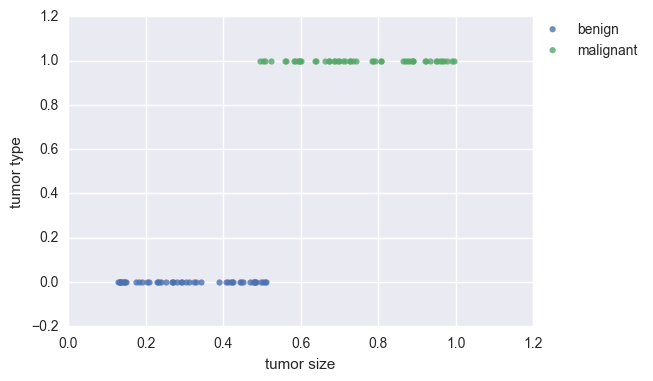

In [41]:
sns.regplot(x=BenignSize,y=BenignCode,fit_reg=False,label='benign')
sns.regplot(x=MalignantSize,y=MalignantCode,fit_reg=False,label='malignant')
plt.ylabel('tumor type')
plt.xlabel('tumor size')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)

We want some sort of continuous model that is close to 0 for small tumors and close to 1 for large tumors. A linear fit can't do this. A polynomial might work, but would need many parameters. Instead, we'll use a logistic (sigmoid) function of the following form:

g=1/(1+exp(-C-A*S)

Where A and C are constants and S is the size of a tumor.

I can generalize this slightly to improve efficiency and scalability as so:

g=1/(1+exp(-Theta*X))

Where X in now the combination of S with a column of 1s, and  Theta is now a 1-by-2 matrix.

Let me add that constant term for X into the dataframe now:


In [85]:
data.insert(1,'const',1)
data.head(3)

,dataCode,const,dataSize
0,0.0,1,0.202224
1,0.0,1,0.209664
2,0.0,1,0.481805


In [43]:
def sigmoid(Theta,X):
    z=np.dot(Theta,X.transpose())
    g=1/(1+np.exp(-z));
    return g

Here I've plotted the sigmoid function with different values for the 2 parameters in Theta.

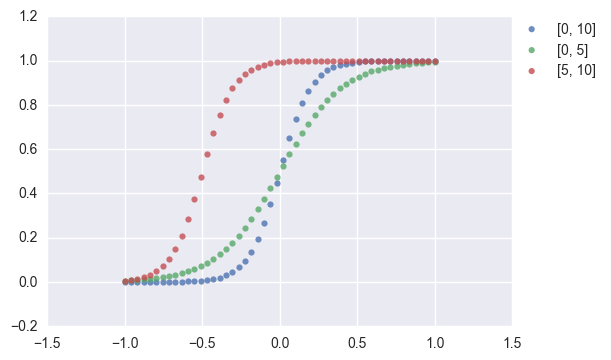

In [44]:
X=np.concatenate(([np.ones(50)],[np.linspace(-1,1, num=50)]),axis=0).transpose();
Theta=[0,10]
sns.regplot(x=X[:,1],y=sigmoid(Theta,X),fit_reg=False,label=Theta);
Theta=[0,5]
sns.regplot(x=X[:,1],y=sigmoid(Theta,X),fit_reg=False,label=Theta);
Theta=[5,10]
sns.regplot(x=X[:,1],y=sigmoid(Theta,X),fit_reg=False,label=Theta);
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);


I want this program to automatically find the best parameters for Theta, so to start I'll just let them be random:

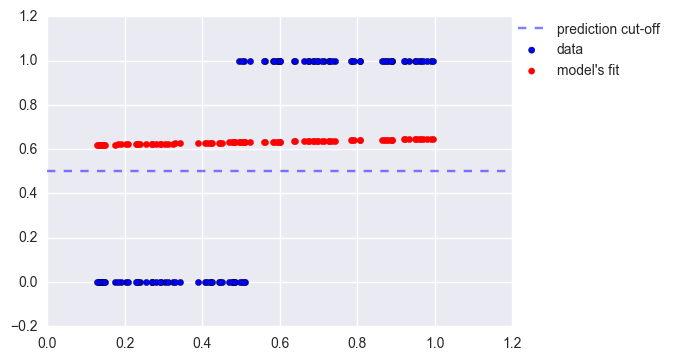

In [81]:
Theta=np.random.rand(len(data.iloc[0,1:]));
X=data.iloc[:,1:].values
y=data.iloc[:,0].values
plt.scatter(X[:,1],y,label='data')
plt.scatter(X[:,1],sigmoid(Theta,X),color='r',label="model's fit")
plt.axhline(.5,linestyle='--',alpha=.5,label="prediction cut-off")
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);

How well does random do?

In [87]:
len(data[data['dataCode']==np.round(sigmoid(Theta,X))])/len(y)

0.5

So it's at 50%. Guessing level. But the machine learning script will make it all better.

Just like in linear regression, we want some way to measuring how close our model is the the data. Some Cost Function. Here we will use two different cost function curves, depending on the real value. If the tumor is benign, I will use a cost function that punishes the model for guessing 1. And vice versa.

So I'll combine all of that into a cost function to use in the machine learning script:

In [46]:
def CostFunction(y,Theta, X):
    J=-1/len(y)*(np.dot(y,np.log(sigmoid(Theta,X)+.005))+
                 np.dot(np.subtract(np.ones(len(y)),[0])-y,np.log(1.005-sigmoid(Theta,X))));
    return J

The final piece we need for the machine learning script is how to automatically adjust Theta. Like in the linear case, we'll use the derivate of the cost function. After some math, this is simply:

np.dot(sigmoid(Theta,X)-y,X)

We now have all the pieces we need. Here is the machine learing script:

In [63]:
Theta=np.random.rand(len(data.iloc[0,1:]));
X=data.iloc[:,1:].values
y=data.iloc[:,0].values
alpha=0.1;
CF=[];
for x in range(0,500):
    Theta=Theta-alpha*np.dot(sigmoid(Theta,X)-y,X)
    j=CostFunction(y,Theta, X)
    CF.append(j)
    #print(Theta)
#print(Theta)
print(CF[-1])

0.0915320653459


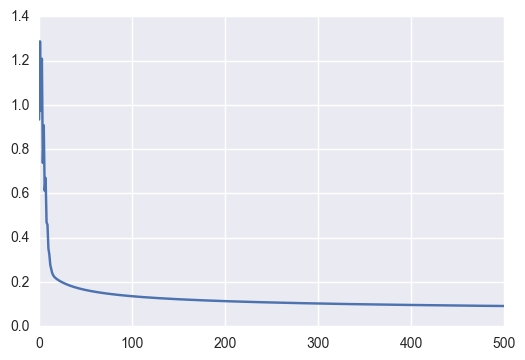

In [64]:
plt.plot(list(np.linspace(0,len(CF),len(CF))),CF)

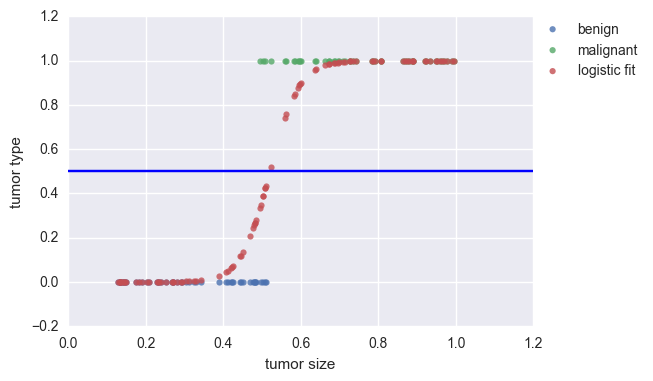

In [65]:
sns.regplot(x=BenignSize,y=BenignCode,fit_reg=False,label='benign')
sns.regplot(x=MalignantSize,y=MalignantCode,fit_reg=False,label='malignant')
sns.regplot(data['dataSize'],sigmoid(Theta,X),fit_reg=False,label='logistic fit')
plt.ylabel('tumor type')
plt.xlabel('tumor size')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
plt.axhline(.5)

And a much better score:

In [74]:
len(data[data['dataCode']==np.round(sigmoid(Theta,X)))/len(y)

0.97